In [1]:
%cd ../src

/Users/carl/Desktop/trading_strats/src


In [2]:
from strategies.SMA import SMA

import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-01-01'
sma_window = 20

ticker = yf.Ticker(ticker)
data = ticker.history(start=start_date, end=end_date)

In [4]:
sma = SMA(short_window=20, long_window=50)

data = sma.execute(data)
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,short_sma,long_sma,signal
Date,,,,,,,,,,
2020-01-02 00:00:00-05:00,71.627084,72.681281,71.373211,72.620834,135480400,0.0,0.0,NaN,NaN,0.0
2020-01-03 00:00:00-05:00,71.847118,72.676447,71.689957,71.914818,146322800,0.0,0.0,NaN,NaN,0.0
2020-01-06 00:00:00-05:00,71.034717,72.526541,70.783256,72.487854,118387200,0.0,0.0,NaN,NaN,0.0
2020-01-07 00:00:00-05:00,72.497506,72.753800,71.926892,72.146919,108872000,0.0,0.0,NaN,NaN,0.0
2020-01-08 00:00:00-05:00,71.849548,73.609760,71.849548,73.307526,132079200,0.0,0.0,NaN,NaN,0.0


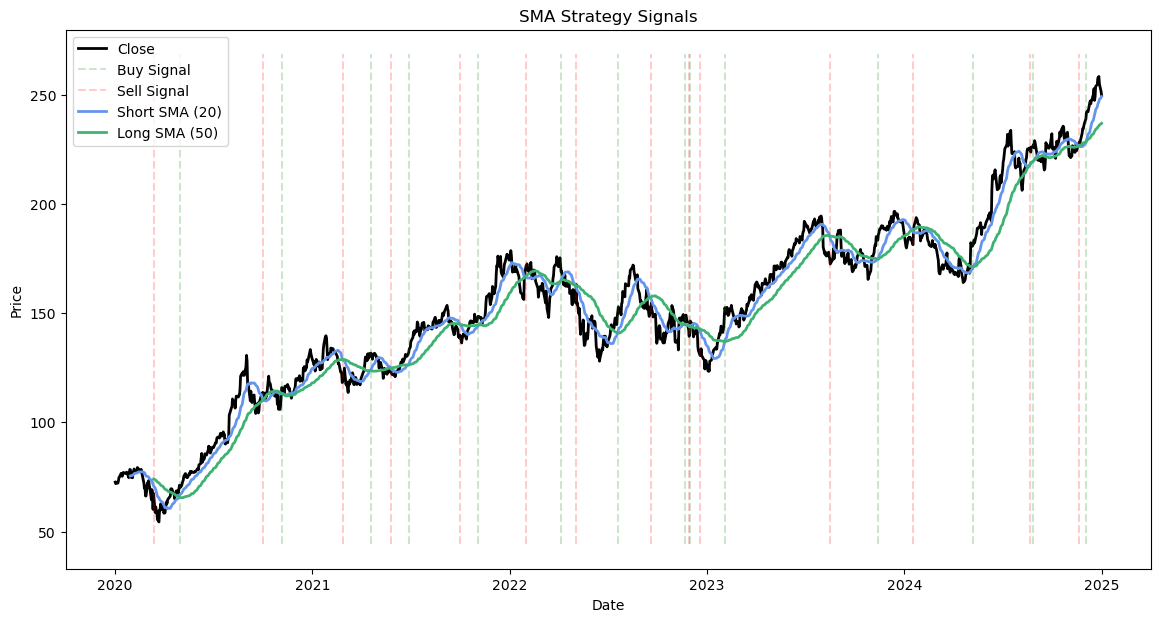

In [5]:
sma.plot_signals()

In [6]:
print(f"SMA Strategy PnL: {sma.pnl(initial_cash=1000000):.2f}")
print(f"Buy and Hold PnL: {sma.buy_and_hold_pnl(initial_cash=1000000):.2f}")

SMA Strategy PnL: 1061784.09
Buy and Hold PnL: 2439996.26


In [7]:
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-01-01'
sma_window = 20

ticker = yf.Ticker(ticker)
data = ticker.history(start=start_date, end=end_date)

In [8]:
from strategies.SMA_optimiser import find_min_hill_climbing

short_window, long_window = find_min_hill_climbing(data, short_window=10, long_window=50, max_iterations=100)


Starting optimization with short_window=10, long_window=50
PnL: 1428361.78
--------------------------------------------------
New short_window=9, long_window=50, PnL=1542929.57
No better neighbor found, stopping optimization.
--------------------------------------------------
Optimized short_window=9, long_window=50
Final PnL: 1542929.57


In [9]:
from strategies.SMA_optimiser import find_min_hill_climbing_expand

short_window, long_window = find_min_hill_climbing_expand(data, short_window=10, long_window=50, max_radius=30)

Starting optimization with short_window=10, long_window=50
PnL: 1428361.78
--------------------------------------------------
Found better neighbor: (9, 50) with PnL=1542929.57
No better neighbor found at radius 1, increasing radius.
Found better neighbor: (9, 52) with PnL=1650637.99
Found better neighbor: (9, 53) with PnL=1811645.80
No better neighbor found at radius 1, increasing radius.
No better neighbor found at radius 2, increasing radius.
No better neighbor found at radius 3, increasing radius.
No better neighbor found at radius 4, increasing radius.
No better neighbor found at radius 5, increasing radius.
No better neighbor found at radius 6, increasing radius.
No better neighbor found at radius 7, increasing radius.
No better neighbor found at radius 8, increasing radius.
No better neighbor found at radius 9, increasing radius.
No better neighbor found at radius 10, increasing radius.
No better neighbor found at radius 11, increasing radius.
No better neighbor found at radius 